<h1>Лекция: "Теория графов встречает линейную алгебру"<h1>

**План занятия:**
<ol>
<li>Что такое матрица смежности и что по ней можно определить</li>
<li>Теорема о числе (i,j)-путей длины k</li>
<li>Характеристический полином графа G</li>
<li>Характеризация спектральных свойств k-регулярных графов</li>
<li>Спектр графа</li>
<li>Изоспектральные графы</li>
</ol>

**1. Что такое матрица смежности и что по ней можно определить**

**Определение** Пусть Г = (V,E), |V| = n,
тогда матрица смежности графа - квадратная бинарная матрица порядка n, элементы которой определяются следующим образом:
$$A(\Gamma) = (A_{ij})_{n \times n} = 
\begin{cases}
1,\ & i\sim j;\\
0,\ & i \nsim j
\end{cases}
$$

In [1]:
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1, 2), (1, 3), (2,6), (3, 4),(3,5),(2,4),(2,5), (3,6)])

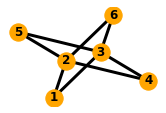

In [5]:
plt.subplot(224)
options = {'node_color': "orange",
          'width': 3,}
nx.draw(G, **options, with_labels=True, font_weight='bold')
plt.show()

**Рассмотрим граф, приведённый выше. Как выглядит его матрица смежности?**

$$
1 = 
\begin{pmatrix}
&\textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{5} & \textbf{6}\\
\textbf{1} & 0& 1& 1& 1& 0&1\\
\textbf{2} & 1& 0& 1& 1& 1&1\\
\textbf{3} & 0& 0& 0& 0& 0&0\\
\textbf{4} & 1& 1& 0& 1& 1&1\\
\textbf{5} & 0& 1& 0& 1& 1&1\\
\textbf{6} & 0& 1& 1& 0& 0&0\\
\end{pmatrix}
\quad 2 = 
\begin{pmatrix}
&\textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{5} & \textbf{6}\\
\textbf{1} & 0& 1& 1& 0& 0& 0\\
\textbf{2} & 1& 0& 0& 1& 1& 1\\
\textbf{3} & 1& 0& 0& 1& 1& 1\\
\textbf{4} & 0& 1& 1& 0& 0& 0\\
\textbf{5} & 0& 1& 1& 0& 0& 0\\
\textbf{6} & 0& 1& 1& 0& 0& 0\\
\end{pmatrix}
\quad 3 = 
\begin{pmatrix}
&\textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{5} & \textbf{6}\\
\textbf{1} & 1& 0& 0& 1& 1& 1\\
\textbf{2} & 0& 1& 1& 0& 0& 0\\
\textbf{3} & 0& 1& 1& 0& 0& 0\\
\textbf{4} & 1& 0& 0& 1& 1& 1\\
\textbf{5} & 1& 0& 0& 1& 1& 1\\
\textbf{6} & 1& 0& 0& 1& 1& 1\\
\end{pmatrix}
$$

In [27]:
radio = widgets.RadioButtons(
    options=['1', '2', '3'],
    value = None,
    description='A = ',
    disabled=False
)
radio

RadioButtons(description='A = ', options=('1', '2', '3'), value=None)

In [32]:
print(adj_matrix())

Неверно. Попробуйте ещё раз.


In [29]:
def adj_matrix():
    if(radio.value == '1'):
        return 'Неверно. Попробуйте ещё раз.'
    elif(radio.value == '2'):
        return 'Верно, матрица смежности - 2.'
    elif(radio.value == '3'):
        return 'Неверно. Попробуйте ещё раз.'
    else:
        return 'Пожалуйста, выберите номер матрицы смежности.'
        

**Определение** Соседством вершины i в графе G называется множество смежных ей вершин.
Обозначение: N(i) = {j: dist(i,j) = 1}, где dist(i,j) - расстояние от вершины i до вершины j.

**Замечание** |N(i)| = deg(i)
(Мощность соседства равна степени вершины i).

**Определение** Следом матрицы A называется сумма диагональных элементов матрицы А.

**Обозначение** $$Tr(A) = \displaystyle\sum_{i=1}^na_{ii}$$

**Маршрут в графе** Если мы зафиксировали две вершины в обыкновенном связном графе, между этими двумя вершинами всегда можно проложить какой-то маршрут от вершины к вершины по ребрам. Ребра и вершины могут поввторяться.

**Путь** - маршрут, в котором рёбра не повторяются.

**Простой путь** - маршрут, в котором ни рёбра, ни вершины не повторяются.

**Кратчайший путь** - кратчайшее расстояние между вершинами.

**Теорема о числе путей длины k между двумя фиксированными вершинами**
Пусть $G = (V,E)$ порядка $n$ имеет матрицу смежности $A = A(G)$ и пусть $B = A^k$, где k - некоторое целое число. Тогда $b_{ij}$ равен числу (i,j)-путей длины k.